#HW 4
##Question 1



In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import math 
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Train_Data.csv', header = None).to_numpy()
test_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Test_Data.csv', header = None).to_numpy()
train_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Train_Labels.csv', header = None).to_numpy()
test_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW4/Q1/Test_Labels.csv', header = None).to_numpy()

In [5]:
def normalize(x):
    y = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)
    return y

First we normalaize data 

In [6]:
train_data = normalize(train_data)
test_data = normalize(test_data)

Kmeans class has been defined to have some sort of attributes and methods auch as  regular Kmeans to just check simple algorithm and then main methods for doing majority rule of clustered-data and then pass it to just test it on test data and labels.

In [113]:
class Kmeans:
    def __init__ ( self , n_itter , k ):
        self.n_itter = n_itter
        self.k = k
        self.n_dimensions = 1
        self.centroids = 0
        self.clusters = {}
        self.assigned_labels = {}

    def initial_centroids( self , x ):
        index = []
        while len(index) != self.k :
            temp = np.random.randint(x.shape[0])
            if temp not in index :
                index.append( temp )
        self.centroids = np.zeros((self.k , x.shape[1]))
        for i in range(self.k):
            self.centroids[ i , : ] = x[ index[ i ] , : ]

    def distance_calculator( self , x , y ):
        return ( sum( ( x - y )**2 ) )**0.5

    def initial_clusters( self ):
        for i in range(self.k):
            self.clusters[ i ] = np.array([])
            self.assigned_labels[ i ] = []

    def assign_data( self ,  x  , label):
        self.initial_clusters()
        for data_num in range( x.shape[0] ):
            temp  = []
            for i in range(self.k):
                temp.append(self.distance_calculator( self.centroids[ i , : ] , x[ data_num , : ] ))
            index = np.argmin(temp)
            self.assigned_labels[ index ].append( label[ data_num ] )
            if len( self.clusters[ index ] ) == 0 :
                self.clusters[ index ] = np.array(x[data_num , :], ndmin = 2)
            else:
                self.clusters[ index ] = np.concatenate((self.clusters[ index ] , np.array(x[data_num , :], ndmin = 2) ) , axis = 0 )

    def recentrize( self , x):
        for i in range(self.k):
            if self.clusters[ i ].shape[0] != 0 :
                self.centroids[ i , : ] = np.mean(self.clusters[ i ] , axis = 0 )
            else :
                self.centroids[ i , : ] = np.zeros((1,x.shape[1]))
    
    def run( self , x , labels ):
        self.initial_centroids( x )
        i = 0 
        temp = 0
        while np.any( temp != self.centroids ):
            self.assign_data( x , labels )
            temp = self.centroids
            self.recentrize( x )
            i = i + 1
            if i == self.n_itter :
                print("max itter reached! \n",self.k)
                break
        return self.centroids

    def cal_loss(self):
        loss = 0
        for i in range( self.k):
            if np.all( self.centroids[i , : ] != 0):
                loss = loss + np.sum(( self.clusters[i] - self.centroids[i , : ])**2)
        return loss

    def test( self , test , centroids ):
        clusters = {}
        k = centroids.shape[0]
        for i in range(k):
            clusters[ i ] = np.array([])
        for data_num in range( test.shape[0] ):
            temp  = []
            for i in range(k):
                temp.append(self.distance_calculator( centroids[ i , : ] , test[ data_num , : ] ))
            index = np.argmin(temp)
            clusters[ index ] = np.concatenate((self.clusters[ index ] , np.array(test[data_num , :], ndmin = 2) ) , axis = 0 )
        return clusters

    def majority_vote( self ):
        temp = {}
        for i in range(self.k):
            unique , count = np.unique( np.array(self.assigned_labels[i]) , return_counts=True)
            temp[ unique[ np.argmax( count ) ] ] = self.centroids[ i ]
        return temp
    
    def test_majority( self , test  , centroids ):
        keys = list(centroids.keys())
        predicted = []
        for data_num in range( test.shape[0] ):
            temp  = []
            for center in centroids.keys():
                temp.append(self.distance_calculator( centroids[center] , test[ data_num , : ] ))
            index = np.argmin(temp)
            predicted.append( keys[ index ] )
        return predicted

    def cal_acc( self , predicted , label ):
        return np.sum( predicted == label )/label.shape[0]

    def print_confusion_mat( self , predicted , label ):
        k = np.unique(label).shape[0]
        keys = np.unique(predicted)
        confusion = np.zeros(( k , k ))
        for i in range(label.shape[0]):
            confusion[ predicted[ i ]-1 , label[ i ]-1 ] += 1
        return pd.DataFrame(confusion)

we had a limit of 400 to maximum itteration for convergence of centroids. because of given labels that had 3 unique labels, so , i pass 3 as second attribute as an illustrator of 3-clusters.

In [114]:
kmeans = Kmeans(400, 3 )

centroids = kmeans.run(train_data,train_labels)
centroids = kmeans.majority_vote()
predicted = kmeans.test_majority(test_data , centroids)
acc = kmeans.cal_acc(np.array(predicted,ndmin=2).T , test_labels)

Confusion Mat is shown below:

In [115]:
mat = kmeans.print_confusion_mat(predicted , test_labels)
mat

,0,1,2
0,7.0,0.0,0.0
1,2.0,8.0,0.0
2,0.0,2.0,14.0


In [109]:
test_labels.shape

(33, 1)

after clustering data based on train data we should test it on test data that accuracy is shown below : 

In [85]:
print( "Accuracy on test data is :" + str(acc*100) + "%")

Accuracy on test data is :90.9090909090909%


This data frame shows how labels and predicted ones match or not , Third column indicates mathing status

In [88]:
pd.DataFrame(np.concatenate((np.array(predicted,ndmin=2).T ,test_labels, np.array(np.array(predicted,ndmin=2).T ==test_labels)) ,axis=1) )

,0,1,2
0,1,1,1
1,3,3,1
2,1,1,1
3,3,3,1
4,3,2,0
5,1,1,1
6,1,1,1
7,1,1,1
8,2,2,1
9,1,1,1


Although numbers of main uniques labels can be dedicated from given files but as an extra work on data we can just try to set more centroids to just try our best to enhance accuracy. Despite the fact that adding more centroids can help accuracy , because there is only 3 given uniq labels , if we try to set more clusters than 3 then we are just omitting some far clusters  to get a better accuracy.

([<matplotlib.axis.XTick at 0x7fce1a4f50b8>,
 <a list of 9 Text major ticklabel objects>)

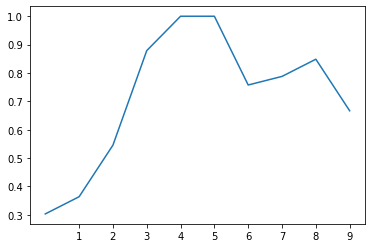

In [76]:
 acc = []
 for i in range(10) :  
    kmeans = Kmeans(400, i+1 )
    centroids = kmeans.run(train_data,train_labels)
    centroids = kmeans.majority_vote()
    predicted = kmeans.test_majority(test_data , centroids)
    acc.append(kmeans.cal_acc(np.array(predicted,ndmin=2).T , test_labels))
plt.plot(acc)
xi = list(np.arange(1,10))
plt.xticks(xi)

In [27]:
a = np.array([1,2,3,4,2,3,1,3,2,3,1,2,3,12,5])
c,d = np.unique(a,return_counts=True)
np.argmax(d)

2

([<matplotlib.axis.XTick at 0x7fce1b909358>,
 <a list of 30 Text major ticklabel objects>)

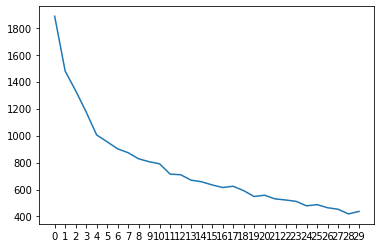

In [92]:
temp = []
for i in range(30):
    a = []
    for j in range(10):
        kmeans = Kmeans(400, i + 1 )
        centroids = kmeans.run(train_data,train_labels)
        a.append(kmeans.cal_loss())
    temp.append(np.mean(a))
plt.plot(temp)
plt.xticks(list(np.arange(len(temp))))

Figure is showing how a expected cost of dedicated centroids can get less by adding up numbers of centroids.